In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = '../data/HousingData.csv'
houseDF = pd.read_csv(data)
houseDF

houseDF = houseDF.dropna()
houseDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


<Axes: >

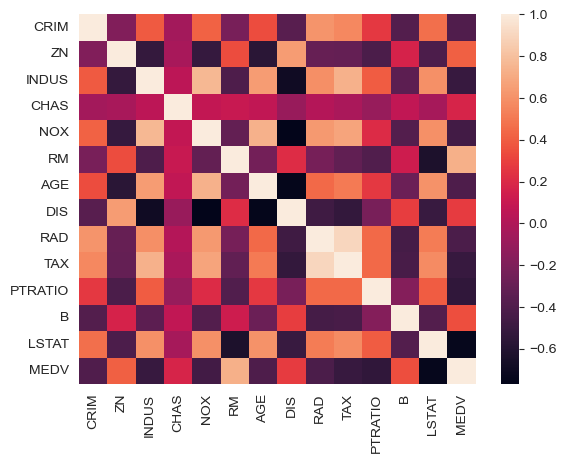

In [4]:
houseDF.corr()

sns.heatmap(houseDF.corr())

In [5]:
featureDF = houseDF[['CRIM', 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]
targetSR = houseDF.MEDV

## 회귀모델 분석

### 기존 방식

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

X_train, x_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size=0.3,
                                                    random_state=5)

In [7]:
print(featureDF.shape, targetSR.shape)
print(X_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(394, 8) (394,)
(275, 8) (275,)
(119, 8) (119,)


In [8]:
scalerList = [StandardScaler, MinMaxScaler, RobustScaler]
modelList = [LinearRegression, KNeighborsRegressor]
train_score_List, test_score_List = [], []


def ML():
    for idx, s in enumerate(scalerList):
        scaler = s()
        scaler.fit(X_train)
        train = scaler.transform(X_train)
        test = scaler.transform(x_test)

        for idx2, m in enumerate(modelList):
            print(m)
            model = m()
            model.fit(train, y_train)
            train_score = model.score(train, y_train)
            test_score = model.score(test, y_test)
            train_score_List.append(train_score)
            test_score_List.append(test_score)
            if test_score > 0.5:
                print(f'{idx+1}-{idx+2} {s.__name__} {m.__name__} : Train score - {train_score:.3f}, Test score - {test_score:.3f}')
            
                train_pred = model.predict(train)
                r2 = r2_score(y_train, train_pred)
                mse = mean_squared_error(y_train, train_pred)
                rmse = mean_squared_error(y_train, train_pred, squared=False)
                mae = mean_absolute_error(y_train, train_pred)
                print(f"\tR2 : {r2:<7.3f}\tMSE : {mse:<7.3f}\tRMSE : {rmse:<7.3f}\tMAE : {mae:<7.3f}\n")
                

ML()

<class 'sklearn.linear_model._base.LinearRegression'>
1-2 StandardScaler LinearRegression : Train score - 0.653, Test score - 0.651
	R2 : 0.653  	MSE : 30.365 	RMSE : 5.510  	MAE : 4.018  

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
1-2 StandardScaler KNeighborsRegressor : Train score - 0.797, Test score - 0.737
	R2 : 0.797  	MSE : 17.816 	RMSE : 4.221  	MAE : 2.939  

<class 'sklearn.linear_model._base.LinearRegression'>
2-3 MinMaxScaler LinearRegression : Train score - 0.653, Test score - 0.651
	R2 : 0.653  	MSE : 30.365 	RMSE : 5.510  	MAE : 4.018  

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
2-3 MinMaxScaler KNeighborsRegressor : Train score - 0.792, Test score - 0.761
	R2 : 0.792  	MSE : 18.251 	RMSE : 4.272  	MAE : 2.978  

<class 'sklearn.linear_model._base.LinearRegression'>
3-4 RobustScaler LinearRegression : Train score - 0.653, Test score - 0.651
	R2 : 0.653  	MSE : 30.365 	RMSE : 5.510  	MAE : 4.018  

<class 'sklearn.neighbors._regression.

### 오늘 배운 방식

In [12]:
from sklearn.utils.discovery import all_estimators
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict

scoreingList = ['accuracy', 'f1', 'r2', 'precision', 'recall', 'neg_mean_squared_error', 'neg_mean_absolute_error']
regressorList = []

for a in all_estimators("regressor"):
    regressorList.append(a[1])
    # model=a()
    # print(a)
    
# print(regressorList)
try: 
    for r in regressorList:
        for sc in scoreingList:
            lr_model = r()
            lr_result = cross_validate(lr_model,
                                       X_train,
                                       y_train,
                                       scoring=sc,
                                       return_train_score=True, 
                                       return_estimator=True)
            print(f'{r} \n')
            print(f'{pd.DataFrame(lr_result)} \n')
except Exception as e:
    print(e)

/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
 

<class 'sklearn.linear_model._bayes.ARDRegression'> 

   fit_time  score_time        estimator  test_score  train_score
0  0.001871    0.000714  ARDRegression()         NaN          NaN
1  0.001693    0.000620  ARDRegression()         NaN          NaN
2  0.001735    0.000635  ARDRegression()         NaN          NaN
3  0.002123    0.000509  ARDRegression()         NaN          NaN
4  0.001507    0.000777  ARDRegression()         NaN          NaN 

<class 'sklearn.linear_model._bayes.ARDRegression'> 

   fit_time  score_time        estimator  test_score  train_score
0  0.001786    0.000682  ARDRegression()         NaN          NaN
1  0.001671    0.000589  ARDRegression()         NaN          NaN
2  0.001444    0.000473  ARDRegression()         NaN          NaN
3  0.001964    0.000737  ARDRegression()         NaN          NaN
4  0.001427    0.000548  ARDRegression()         NaN          NaN 

<class 'sklearn.linear_model._bayes.ARDRegression'> 

   fit_time  score_time        estimator  

/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
 

<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'> 

   fit_time  score_time                                          estimator  \
0  0.027412    0.002354  (DecisionTreeRegressor(max_depth=3, random_sta...   
1  0.027157    0.002314  (DecisionTreeRegressor(max_depth=3, random_sta...   
2  0.027446    0.002350  (DecisionTreeRegressor(max_depth=3, random_sta...   
3  0.028874    0.002519  (DecisionTreeRegressor(max_depth=3, random_sta...   
4  0.028777    0.002390  (DecisionTreeRegressor(max_depth=3, random_sta...   

   test_score  train_score  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN   

<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'> 

   fit_time  score_time                                          estimator  \
0  0.028301    0.002428  (DecisionTreeRegressor(max_depth=3, random_sta...   
1  0.026350    0.002277  (DecisionTreeRegressor(max_depth=3, random_sta

/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
 

<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'> 

   fit_time  score_time                                          estimator  \
0  0.028784    0.002294  (DecisionTreeRegressor(max_depth=3, random_sta...   
1  0.028015    0.002180  (DecisionTreeRegressor(max_depth=3, random_sta...   
2  0.026360    0.002091  (DecisionTreeRegressor(max_depth=3, random_sta...   
3  0.027200    0.002283  (DecisionTreeRegressor(max_depth=3, random_sta...   
4  0.007212    0.000847  (DecisionTreeRegressor(max_depth=3, random_sta...   

   test_score  train_score  
0    0.852578     0.877795  
1    0.820645     0.877391  
2    0.777768     0.902654  
3    0.756144     0.884972  
4    0.552949     0.876760   

<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'> 

   fit_time  score_time                                          estimator  \
0  0.026123    0.002214  (DecisionTreeRegressor(max_depth=3, random_sta...   
1  0.026819    0.002470  (DecisionTreeRegressor(max_depth=3, random_sta

/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
 

<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'> 

   fit_time  score_time                                          estimator  \
0  0.027371    0.002608  (DecisionTreeRegressor(max_depth=3, random_sta...   
1  0.028040    0.002348  (DecisionTreeRegressor(max_depth=3, random_sta...   
2  0.028560    0.002869  (DecisionTreeRegressor(max_depth=3, random_sta...   
3  0.029054    0.002481  (DecisionTreeRegressor(max_depth=3, random_sta...   
4  0.030076    0.002805  (DecisionTreeRegressor(max_depth=3, random_sta...   

   test_score  train_score  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN   

<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'> 

   fit_time  score_time                                          estimator  \
0  0.028409    0.002168  (DecisionTreeRegressor(max_depth=3, random_sta...   
1  0.026182    0.002286  (DecisionTreeRegressor(max_depth=3, random_sta

/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
 

<class 'sklearn.ensemble._bagging.BaggingRegressor'> 

   fit_time  score_time                                          estimator  \
0  0.010321    0.000963  (DecisionTreeRegressor(random_state=621825205)...   
1  0.010625    0.001270  (DecisionTreeRegressor(random_state=793060104)...   
2  0.010284    0.001076  (DecisionTreeRegressor(random_state=303077226)...   
3  0.011047    0.002083  (DecisionTreeRegressor(random_state=370896405)...   
4  0.013377    0.001391  (DecisionTreeRegressor(random_state=2134214430...   

   test_score  train_score  
0    0.836517     0.956779  
1    0.796393     0.961460  
2    0.738804     0.970513  
3    0.803843     0.961835  
4    0.623217     0.967907   

<class 'sklearn.ensemble._bagging.BaggingRegressor'> 

   fit_time  score_time                                          estimator  \
0  0.011594    0.001373  (DecisionTreeRegressor(random_state=8797588), ...   
1  0.010997    0.001235  (DecisionTreeRegressor(random_state=1672853349...   
2  0.010328

/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
 

<class 'sklearn.ensemble._bagging.BaggingRegressor'> 

   fit_time  score_time                                          estimator  \
0  0.010248    0.001024  (DecisionTreeRegressor(random_state=1531187944...   
1  0.009960    0.000923  (DecisionTreeRegressor(random_state=1782556510...   
2  0.010866    0.001123  (DecisionTreeRegressor(random_state=2117417415...   
3  0.010879    0.001296  (DecisionTreeRegressor(random_state=686398447)...   
4  0.010178    0.001523  (DecisionTreeRegressor(random_state=1313301892...   

   test_score  train_score  
0  -13.703904    -3.515401  
1  -11.994909    -3.837173  
2  -23.290125    -3.116793  
3  -17.028493    -4.057870  
4  -29.450678    -3.026602   

<class 'sklearn.ensemble._bagging.BaggingRegressor'> 

   fit_time  score_time                                          estimator  \
0  0.011108    0.001128  (DecisionTreeRegressor(random_state=1101473590...   
1  0.010961    0.001043  (DecisionTreeRegressor(random_state=1667628977...   
2  0.010747

/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
 

In [10]:
from sklearn.utils.discovery import all_estimators
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict

scoringList = ['accuracy', 'f1', 'r2', 'precision', 'recall', 'neg_mean_squared_error', 'neg_mean_absolute_error']
regressorList = []

for a in all_estimators("regressor"):
    regressorList.append(a[1]) 

try:
    for r in regressorList:
        for sc in scoringList:
            
            if r.__name__ == 'ARDRegression':
                if sc in ['accuracy', 'f1', 'precision', 'recall']:
                    # print(f"{r.__name__} 모델은 현재 스코어: {sc} 측정에 적합하지 않을 수 있습니다.")  
                    continue
                
            elif r.__name__ == 'BayesianRidge':
                if sc in ['accuracy', 'f1', 'precision', 'recall']:
                    # print(f"{r.__name__} 모델은 현재 스코어: {sc} 측정에 적합하지 않을 수 있습니다.")  
                    continue 
                
            elif r.__name__ == 'CCA':
                if sc == 'r2':
                    try:
                        lr_result = cross_validate(r(), X_train, y_train, scoring=sc, return_train_score=True,return_estimator=True)
                        print(pd.DataFrame(lr_result))
                    except Exception as e:
                        print(f"예외 발생: {e}")
                        print(f"모델: {r.__name__}, 스코어 지표: {sc}")
                    continue
                
            lr_result = cross_validate(r(), X_train, y_train, scoring=sc, return_train_score=True,return_estimator=True)
            print(pd.DataFrame(lr_result))
except Exception as e:
    print(f"예외 발생: {e}")
    print(f"모델: {r.__name__}, 스코어 지표: {sc}")


   fit_time  score_time        estimator  test_score  train_score
0  0.002195    0.000608  ARDRegression()    0.618969     0.656763
1  0.001524    0.000423  ARDRegression()    0.632490     0.649751
2  0.001571    0.000487  ARDRegression()    0.700579     0.618508
3  0.002518    0.000647  ARDRegression()    0.448145     0.682966
4  0.001257    0.000426  ARDRegression()    0.651254     0.637813


/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
 

   fit_time  score_time        estimator  test_score  train_score
0  0.001797    0.000494  ARDRegression()  -39.762427   -28.632351
1  0.001574    0.000462  ARDRegression()  -30.297778   -31.133524
2  0.001623    0.000462  ARDRegression()  -30.951279   -31.912948
3  0.002867    0.000564  ARDRegression()  -40.778542   -28.857765
4  0.001397    0.000484  ARDRegression()  -25.758745   -32.972450
   fit_time  score_time        estimator  test_score  train_score
0  0.001739    0.000568  ARDRegression()   -4.208026    -3.911455
1  0.001927    0.000594  ARDRegression()   -4.152187    -3.972788
2  0.001597    0.000396  ARDRegression()   -4.065020    -4.027678
3  0.002059    0.000449  ARDRegression()   -4.582929    -3.909040
4  0.001494    0.000533  ARDRegression()   -3.738243    -4.107229
   fit_time  score_time                                          estimator  \
0  0.030434    0.002499  (DecisionTreeRegressor(max_depth=3, random_sta...   
1  0.029728    0.002408  (DecisionTreeRegressor(max_

/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
 


   fit_time  score_time                                          estimator  \
0  0.030011    0.002619  (DecisionTreeRegressor(max_depth=3, random_sta...   
1  0.029082    0.002459  (DecisionTreeRegressor(max_depth=3, random_sta...   
2  0.029113    0.002438  (DecisionTreeRegressor(max_depth=3, random_sta...   
3  0.017478    0.002131  (DecisionTreeRegressor(max_depth=3, random_sta...   
4  0.028757    0.002273  (DecisionTreeRegressor(max_depth=3, random_sta...   

   test_score  train_score  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN  


/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
 

   fit_time  score_time                                          estimator  \
0  0.028309    0.002629  (DecisionTreeRegressor(max_depth=3, random_sta...   
1  0.027763    0.002604  (DecisionTreeRegressor(max_depth=3, random_sta...   
2  0.029853    0.002346  (DecisionTreeRegressor(max_depth=3, random_sta...   
3  0.017464    0.001450  (DecisionTreeRegressor(max_depth=3, random_sta...   
4  0.028067    0.002228  (DecisionTreeRegressor(max_depth=3, random_sta...   

   test_score  train_score  
0    0.869270     0.871155  
1    0.817749     0.868006  
2    0.745152     0.903620  
3    0.754123     0.895728  
4    0.575380     0.893393  
   fit_time  score_time                                          estimator  \
0  0.027095    0.002572  (DecisionTreeRegressor(max_depth=3, random_sta...   
1  0.026263    0.002390  (DecisionTreeRegressor(max_depth=3, random_sta...   
2  0.027694    0.002211  (DecisionTreeRegressor(max_depth=3, random_sta...   
3  0.027085    0.002278  (DecisionTreeRegress

/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
 

   fit_time  score_time                                          estimator  \
0  0.026872    0.002484  (DecisionTreeRegressor(max_depth=3, random_sta...   
1  0.027790    0.002502  (DecisionTreeRegressor(max_depth=3, random_sta...   
2  0.027951    0.002353  (DecisionTreeRegressor(max_depth=3, random_sta...   
3  0.011670    0.001289  (DecisionTreeRegressor(max_depth=3, random_sta...   
4  0.028006    0.002300  (DecisionTreeRegressor(max_depth=3, random_sta...   

   test_score  train_score  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN  
   fit_time  score_time                                          estimator  \
0  0.018211    0.001577  (DecisionTreeRegressor(max_depth=3, random_sta...   
1  0.026411    0.002224  (DecisionTreeRegressor(max_depth=3, random_sta...   
2  0.027716    0.002313  (DecisionTreeRegressor(max_depth=3, random_sta...   
3  0.029142    0.002076  (DecisionTreeRegress

/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
 

   fit_time  score_time                                          estimator  \
0  0.026135    0.001577  (DecisionTreeRegressor(random_state=2125512050...   
1  0.011352    0.001406  (DecisionTreeRegressor(random_state=1765152152...   
2  0.010556    0.001228  (DecisionTreeRegressor(random_state=774413898)...   
3  0.011364    0.001640  (DecisionTreeRegressor(random_state=1640283769...   
4  0.011129    0.001420  (DecisionTreeRegressor(random_state=303330980)...   

   test_score  train_score  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN  
   fit_time  score_time                                          estimator  \
0  0.010454    0.001178  (DecisionTreeRegressor(random_state=821856761)...   
1  0.010725    0.001263  (DecisionTreeRegressor(random_state=1746026844...   
2  0.010419    0.001179  (DecisionTreeRegressor(random_state=945434662)...   
3  0.010066    0.001173  (DecisionTreeRegress

In [15]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error
from sklearn.utils import all_estimators

# 회귀 분석에 적합한 평가 지표 정의
scoringList = {
    'r2': 'r2',
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'neg_mean_absolute_error': 'neg_mean_absolute_error'
}

# 회귀 모델 리스트 생성
regressorList = all_estimators(type_filter='regressor')

# 각 모델에 대해 교차 검증 수행
results = []
for name, RegressorClass in regressorList:
    # 모델의 인스턴스 생성
    try:
        model = RegressorClass()
        cv_results = cross_validate(model, X_train, y_train, scoring=scoringList, return_train_score=True)
        results.append((name, pd.DataFrame(cv_results).mean()))
    except Exception as e:
        print(f"{name} 실행 중 오류 발생: {e}")

# 결과 출력 (선택적)
for name, result in results:
    print(f"{name}:")
    print(result)
    print()


CCA 실행 중 오류 발생: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py", line 253, in fit
    raise ValueError(
ValueError: `n_components` upper bound is 1. Got 2 instead. Reduce `n_components`.


/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of 

IsotonicRegression 실행 중 오류 발생: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/isotonic.py", line 351, in fit
    X, y = self._build_y(X, y, sample_weight)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/isotonic.py", line 266, in _build_y
    self._ch

/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The d

MultiOutputRegressor 실행 중 오류 발생: __init__() missing 1 required positional argument: 'estimator'
MultiTaskElasticNet 실행 중 오류 발생: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py", line 2386, in fit
    raise ValueError("For mono-task outputs, use %

/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:282: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:282: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:282: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

QuantileRegressor 실행 중 오류 발생: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/linear_model/_quantile.py", line 208, in fit
    raise ValueError(
ValueError: Solver interior-point is not anymore available in SciPy >= 1.11.0.


/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/neighbors/_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/U

RegressorChain 실행 중 오류 발생: __init__() missing 1 required positional argument: 'base_estimator'
StackingRegressor 실행 중 오류 발생: __init__() missing 1 required positional argument: 'estimators'
VotingRegressor 실행 중 오류 발생: __init__() missing 1 required positional argument: 'estimators'
ARDRegression:
fit_time                          0.001663
score_time                        0.000745
test_r2                           0.610288
train_r2                          0.649160
test_neg_mean_squared_error     -33.509754
train_neg_mean_squared_error    -30.701808
test_neg_mean_absolute_error     -4.149281
train_neg_mean_absolute_error    -3.985638
dtype: float64

AdaBoostRegressor:
fit_time                          0.027710
score_time                        0.002535
test_r2                           0.754089
train_r2                          0.889214
test_neg_mean_squared_error     -20.751162
train_neg_mean_squared_error     -9.695461
test_neg_mean_absolute_error     -3.366579
train_neg_mean_absolute_

/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:282: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:282: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:282: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

In [16]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error
from sklearn.utils import all_estimators
import pandas as pd

# 회귀 분석에 적합한 평가 지표 정의
scoringList = {
    'r2': 'r2',
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'neg_mean_absolute_error': 'neg_mean_absolute_error'
}

# 회귀 모델 리스트 생성
regressorList = all_estimators(type_filter='regressor')

# 각 모델에 대해 교차 검증 수행
results = []
for name, RegressorClass in regressorList:
    # 모델의 인스턴스 생성
    try:
        model = RegressorClass()
        if hasattr(model, "predict"):  # 모델이 predict 메소드를 가지고 있는지 확인
            cv_results = cross_validate(model, X_train, y_train, scoring=scoringList, return_train_score=True)
            # 교차 검증 결과로부터 훈련 및 테스트 점수의 평균 계산
            train_score = cv_results['train_r2'].mean()
            test_score = cv_results['test_r2'].mean()
            results.append((name, train_score, test_score))
    except Exception as e:
        print(f"{name} 실행 중 오류 발생: {e}")

# 결과 출력
for name, train_score, test_score in results:
    print(f"{name}:")
    print(f"Train Score (R2): {train_score:.3f}")
    print(f"Test Score (R2): {test_score:.3f}\n")


CCA 실행 중 오류 발생: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py", line 253, in fit
    raise ValueError(
ValueError: `n_components` upper bound is 1. Got 2 instead. Reduce `n_components`.


/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of 

IsotonicRegression 실행 중 오류 발생: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/isotonic.py", line 351, in fit
    X, y = self._build_y(X, y, sample_weight)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/isotonic.py", line 266, in _build_y
    self._ch

/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The d

MultiOutputRegressor 실행 중 오류 발생: __init__() missing 1 required positional argument: 'estimator'
MultiTaskElasticNet 실행 중 오류 발생: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py", line 2386, in fit
    raise ValueError("For mono-task outputs, use %

/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:282: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:282: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:282: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

QuantileRegressor 실행 중 오류 발생: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/linear_model/_quantile.py", line 208, in fit
    raise ValueError(
ValueError: Solver interior-point is not anymore available in SciPy >= 1.11.0.
RegressorChain 실행 중 오류 발생: __init__() missing 1 required p

/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:282: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:282: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:282: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT